In [ ]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/BananaLSD.zip")

INFO patool: Extracting /content/BananaLSD.zip ...
INFO:patool:Extracting /content/BananaLSD.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_mau7qqdv -- /content/BananaLSD.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_mau7qqdv -- /content/BananaLSD.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/BananaLSD.zip extracted to `Banana Leaf Spot Diseases (BananaLSD) Dataset for Classification of Banana Leaf Diseases Using Machine Learning'.
INFO:patool:... /content/BananaLSD.zip extracted to `Banana Leaf Spot Diseases (BananaLSD) Dataset for Classification of Banana Leaf Diseases Using Machine Learning'.


'Banana Leaf Spot Diseases (BananaLSD) Dataset for Classification of Banana Leaf Diseases Using Machine Learning'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/B/BananaLSD/OriginalSet',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Classification task
    subset='training'
)

Found 752 images belonging to 4 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    '/content/B/BananaLSD/OriginalSet',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 185 images belonging to 4 classes.


In [ ]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [ ]:
for layer in vgg_base.layers:
  layer.trainable = False

In [ ]:
def build_classifier(vgg_base, num_classes):
    x = vgg_base.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=vgg_base.input, outputs=output)
    return model

In [ ]:
num_classes = len(train_generator.class_indices)
model = build_classifier(vgg_base, num_classes)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4528 - loss: 3.2571 - val_accuracy: 0.8649 - val_loss: 0.4503
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.8138 - loss: 0.4943 - val_accuracy: 0.8865 - val_loss: 0.3961
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 421ms/step - accuracy: 0.8863 - loss: 0.3169 - val_accuracy: 0.8865 - val_loss: 0.3023
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.9065 - loss: 0.2901 - val_accuracy: 0.8865 - val_loss: 0.2942
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 405ms/step - accuracy: 0.9158 - loss: 0.2515 - val_accuracy: 0.9135 - val_loss: 0.2261
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step - accuracy: 0.9365 - loss: 0.2024 - val_accuracy: 0.9189 - val_loss: 0.2418
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.9119 - loss: 0.2185 - val_accuracy: 0.9027 - val_loss: 0.2780
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step - accuracy: 0.9580 - loss: 0.1350 - val_accuracy: 0.9081 -

In [ ]:
# %rm -rf /content/U

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size as needed
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to [0, 1] if that was done in the generator
    return img_array


In [ ]:
# Example image paths
test_image_paths = [
    '/content/B/BananaLSD/AugmentedSet/healthy/0.jpeg', # healthy
    '/content/B/BananaLSD/AugmentedSet/cordana/0.jpeg', # cordana
    '/content/B/BananaLSD/AugmentedSet/pestalotiopsis/1.jpeg', #pestalotiopsis
    '/content/B/BananaLSD/AugmentedSet/sigatoka/0.jpeg', #sigatoka
    # Add more image paths as needed
]

for img_path in test_image_paths:
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)

    # If using categorical crossentropy, use argmax to get the class index
    predicted_class = np.argmax(predictions, axis=1)
    print(f'Predicted class for {img_path}: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class for /content/B/BananaLSD/AugmentedSet/healthy/0.jpeg: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class for /content/B/BananaLSD/AugmentedSet/cordana/0.jpeg: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class for /content/B/BananaLSD/AugmentedSet/pestalotiopsis/1.jpeg: [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class for /content/B/BananaLSD/AugmentedSet/sigatoka/0.jpeg: [3]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


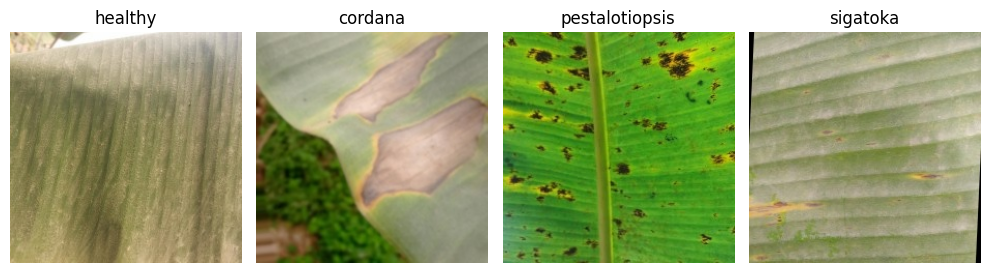

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a mapping of class indices to class names
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Reverse mapping

plt.figure(figsize=(10, 10))
for i, img_path in enumerate(test_image_paths):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    plt.subplot(1, len(test_image_paths), i + 1)
    plt.imshow(image.load_img(img_path))  # Load original image
    plt.title(class_labels[predicted_class])  # Show predicted class label
    plt.axis('off')
plt.tight_layout()
plt.show()
